# HR Analytics

#### Initial Analysis of the Dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
employees=pd.read_csv("turnover.csv")

In [3]:
employees.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
employees.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Data Preprocessing

The sales are salary features are not numeric. So we need to do some preprocessing to convert them to numbers.

In [6]:
employees['salary'] = pd.factorize(employees['salary'])[0]
employees['sales'] = pd.factorize(employees['sales'])[0]

#### Check corelation between features

To find out which feature affects the attrition the most, we calculate the correlation between different features.

In [7]:
correlation_matrix = employees.corr(method='pearson')
correlation_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.015413,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.011855,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.005577,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002387,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.001611,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.019215,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.043814,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.015170,0.098119
sales,0.015413,0.011855,0.005577,-0.002387,-0.001611,0.019215,-0.043814,0.015170,1.000000,0.033415
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,0.033415,1.000000


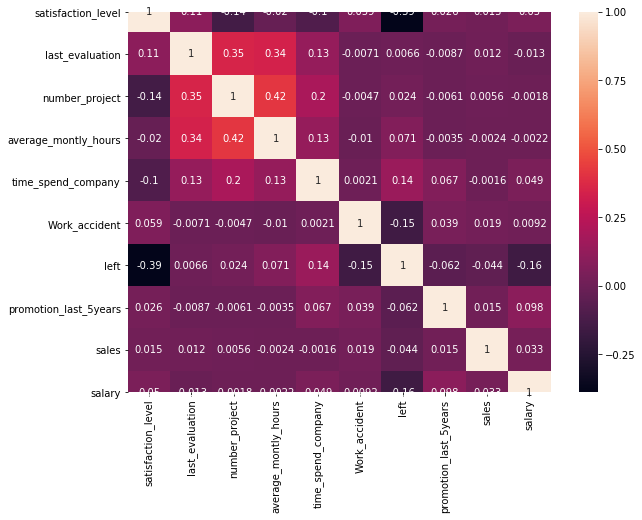

In [8]:
# To plot the correlation_matrix:
import seaborn as maps
fig=plt.subplots(figsize=(10,7))
maps.heatmap(correlation_matrix, square = True,annot=True)
plt.show()

From the above graph, it is clear that people who left have lower satisfaction level, had low salary and number of years spent in the company is high. So we can deduce that company is losing its experienced employees due to low salary and low satisfaction levels.

In [9]:
corr_left=pd.DataFrame(correlation_matrix['left'].drop('left').sort_values(ascending=False))
corr_left

,left
time_spend_company,0.144822
average_montly_hours,0.071287
number_project,0.023787
last_evaluation,0.006567
sales,-0.043814
promotion_last_5years,-0.061788
Work_accident,-0.154622
salary,-0.157898
satisfaction_level,-0.388375


#### Distribution of some interesting features

Visualize effect of some of the interesting features on whether the employee has left or not.

Effect of Employee satisfaction on employee attrition. Lower the satisfaction level higher chances employee leaving

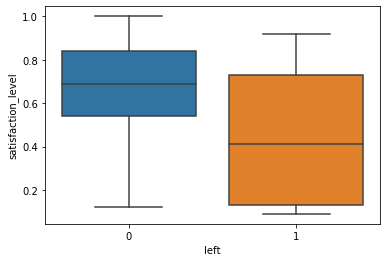

In [11]:
maps.boxplot(x="left", y= "satisfaction_level", data=employees)
plt.show()

Effect of last performance evaluation on employee attrition

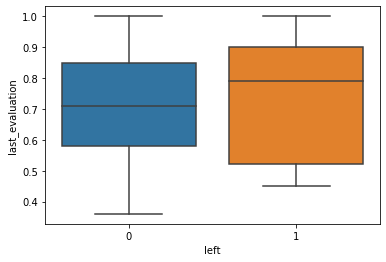

In [13]:
maps.boxplot(x="left", y= "last_evaluation", data=employees)
plt.show()

Do number of projects (frequent changes) cause attrition? Seems people who worked on between 3 to 4 prjects stayed on than people with very less changes or very high changes

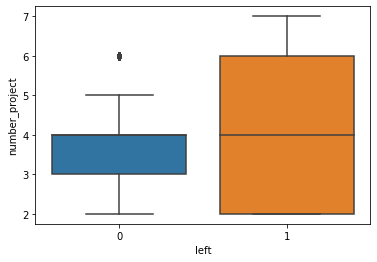

In [14]:
maps.boxplot(x="left", y= "number_project", data=employees)
plt.show()

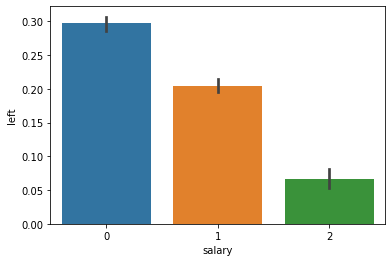

In [15]:
maps.barplot(x = 'salary', y = 'left', data = employees)

We see that people with less salary are more likely to leave the company

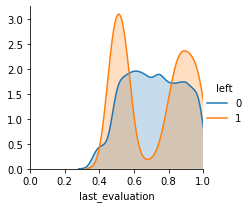

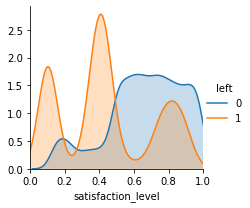

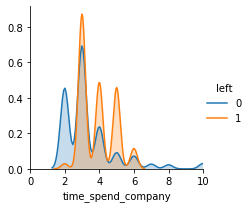

In [11]:
# For last_evaluation

plot_features = ['last_evaluation','satisfaction_level','time_spend_company']

for pf in plot_features:
    g = maps.FacetGrid(employees, hue="left")
    g.map(maps.kdeplot,pf,shade= True)
    g.set(xlim=(0, employees[pf].max()))
    g.add_legend()

Preprocess data for different classifiers:

In [16]:
# To separate label and features in data
labels = np.where(employees['left'] == 1, 1, 0) 
features = employees.drop('left', axis = 1).as_matrix().astype(np.float)
label_names = np.unique(labels)
feature_names = list(employees.axes[1])

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Splitting dataset into train and test data

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.1, random_state=0)

### Comparing Different Classifiers

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection, linear_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

classifiers = [["KNN",KNeighborsClassifier(n_neighbors=3, weights='distance')],
["DT",DecisionTreeClassifier(random_state=0)],
["NB", MultinomialNB()]
]
    
classifier_types = []
for name, clf in classifiers:
    print('\nMetric for ' + name)
    cv_predicted = cross_val_predict(clf, X_train, Y_train, cv=5)
    print(metrics.classification_report(Y_train, cv_predicted))
    scores = model_selection.cross_val_score(clf, X_train, Y_train)
    print('\nCross validation scores: ', scores.mean())

    clf.fit(X_train, Y_train)
    predictions = clf.predict(X_test)
    print('Accuracy score for '+ name, accuracy_score(Y_test, predictions))
    classifier_types.append((name, clf))


Metric for KNN
              precision    recall  f1-score   support

           0       0.98      0.95      0.97     10287
           1       0.85      0.95      0.90      3212

    accuracy                           0.95     13499
   macro avg       0.92      0.95      0.93     13499
weighted avg       0.95      0.95      0.95     13499



C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



Cross validation scores:  0.9458477357108164
Accuracy score for KNN 0.9553333333333334

Metric for DT
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10287
           1       0.94      0.97      0.95      3212

    accuracy                           0.98     13499
   macro avg       0.96      0.97      0.97     13499
weighted avg       0.98      0.98      0.98     13499


Cross validation scores:  0.9744426333423887
Accuracy score for DT 0.98

Metric for NB


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


              precision    recall  f1-score   support

           0       0.77      0.99      0.87     10287
           1       0.68      0.06      0.10      3212

    accuracy                           0.77     13499
   macro avg       0.72      0.52      0.49     13499
weighted avg       0.75      0.77      0.69     13499


Cross validation scores:  0.7692419714669104
Accuracy score for NB 0.77


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


We observe that Decision tree classifier is the best for this dataset.

#### Predict if employee will leave or not with Decision Tree classifier

In [15]:
from sklearn.tree import export_graphviz
from sklearn import tree
clf = DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.1)
clf = clf.fit(X_train, Y_train)
tree.export_graphviz(clf, out_file='tree.dot')

In [16]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pydotplus

To check if the following test employee will leave or not

In [21]:
# Test employee features
test = [   0.44,    0.57,    2,    141,      3,      0,      0,      7,      1  ]

In [22]:
predict = clf.predict_proba(np.asarray(test).reshape(-9,9))
predict

array([[0.39632686, 0.60367314]])

This employee will leave!!! HR Action needed.

#### Retention profile

In [23]:
# Create a dataframe for employees who left.
left_df = employees[employees['left'] == 1]

# Create a dataframe for employees who stayed.
stay_df = employees[employees['left'] == 0]

Factors contributing to satisfaction level

In [29]:
# Factors contributing to satisfaction levels among staff who left.
print(left_df.corr(method='pearson')['satisfaction_level'][1:].sort_values(ascending=False))

time_spend_company       0.446440
last_evaluation          0.182295
Work_accident            0.005864
sales                    0.005602
promotion_last_5years    0.005516
salary                  -0.005837
average_montly_hours    -0.084117
number_project          -0.227113
left                          NaN
Name: satisfaction_level, dtype: float64


In [30]:
# Factors contributing to satisfaction levels among staff who stay.
print(stay_df.corr(method='pearson')['satisfaction_level'][1:].sort_values(ascending=False))

last_evaluation          0.086357
average_montly_hours     0.055354
promotion_last_5years    0.001228
Work_accident           -0.003128
sales                   -0.004398
salary                  -0.014700
number_project          -0.092799
time_spend_company      -0.168791
left                          NaN
Name: satisfaction_level, dtype: float64


In [31]:
# Factors correlated to satisfaction_level
correlations2 = employees.corr(method='pearson')
satisfaction_df = correlations2['satisfaction_level'][1:].abs().sort_values(ascending=False)
satisfaction_df = satisfaction_df.drop('left')
print(satisfaction_df)

number_project           0.142970
last_evaluation          0.105021
time_spend_company       0.100866
Work_accident            0.058697
salary                   0.050022
promotion_last_5years    0.025605
average_montly_hours     0.020048
sales                    0.015413
Name: satisfaction_level, dtype: float64


number_project, last_evaluation and time_spend_company are the top three factors contributing to high satisfaction level amongst employees

### Increase satisfaction level

In [32]:
# To separate label and features in data
X_train_ = X_train[:, 1:]
X_test_ = X_test[:, 1:]
y_train_ = X_train[:, 0]
y_test_ = X_test[:, 0]

X_ = np.vstack((X_train_, X_test_))
y_ = np.append(y_train_, y_test_)

Regression models to predict employee's satisfaction level

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

models=[['LR',LinearRegression()],['DT',DecisionTreeRegressor()],['RF',RandomForestRegressor()]]
for names,model in models:
    results = cross_val_score(model, X_,y_, cv = KFold(n_splits=10,random_state=7),
    scoring = 'neg_mean_squared_error')
    print(names, results.mean())

LR -0.058014550239924204
DT -0.050215395875058674


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

RF -0.03149440489187609


Random Forest performs well

In [36]:
# Test with random test values
regres= RandomForestRegressor()
regres.fit(X_train_,y_train_)
predicted_sat = regres.predict(X_test_)
print(predicted_sat)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.37  0.62  0.776 ... 0.524 0.547 0.856]
